# Bank Marketing Dataset

In this notebook, I explored the Bank Marketing dataset using classification. The dataset contains various features of the client and his decision to take a deposit in the bank.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub

## Uploading a dataset

In [2]:
dataset_path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")
df = pd.read_csv(dataset_path + "/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data analysis

### Missing values

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no NaN in the data.

### Duplicated

In [4]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


There are non duplicate in the data.

### Checking for class imbalance

In [5]:
no =  df[df["deposit"] == "no"].shape[0]
yes =  df[df["deposit"] == "yes"].shape[0]

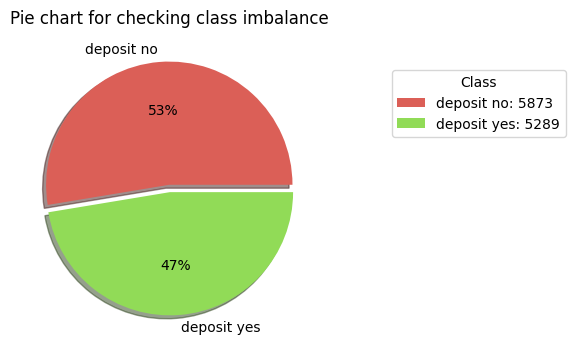

In [6]:
plt.figure(figsize=(4, 4))
plt.pie(
    x=[no, yes],
    labels=["deposit no", "deposit yes"],
    colors=sns.color_palette("hls", 4),
    autopct='%.0f%%',
    shadow=True,
    explode=[0.01, 0.05]
)
plt.title("Pie chart for checking class imbalance")
plt.legend(labels=[f"deposit no: {no}", f"deposit yes: {yes}"], title="Class", bbox_to_anchor=(1.2, 0.9))
plt.show()

The difference in grades is about 6%, which is not a strong class imbalance.

### Checking for binary features imbalance

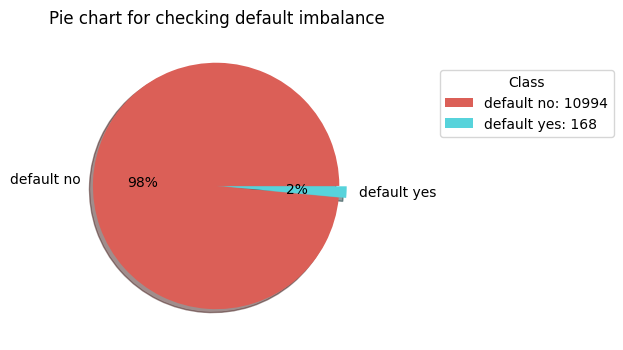

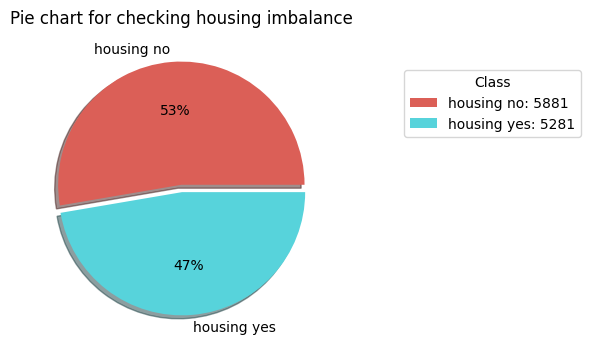

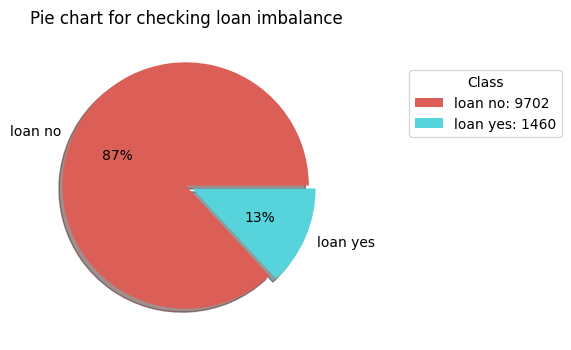

In [7]:
columns = [
    "default",
    "housing",
    "loan"
]

for col in columns:
    plt.figure(figsize=(4, 4))
    no =  df[df[col] == "no"].shape[0]
    yes =  df[df[col] == "yes"].shape[0]
    plt.pie(
        x=[no, yes],
        labels=[f"{col} no", f"{col} yes"],
        colors=sns.color_palette("hls", 2),
        autopct='%.0f%%',
        shadow=True,
        explode=[0.01, 0.05]
    )
    plt.title(f"Pie chart for checking {col} imbalance")
    plt.legend(labels=[f"{col} no: {no}", f"{col} yes: {yes}"], title="Class", bbox_to_anchor=(1.2, 0.9))
    plt.show()

### Сhecking the interaction between default and deposit

In [8]:
pd.crosstab(df['default'], df['deposit'], normalize='index')

deposit,no,yes
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


There is a large imbalance in the default feature, and it is also observed that the probability of taking a deposit with default no is greater than default yes.

### Сhecking the interaction between loan and deposit

In [9]:
pd.crosstab(df['loan'], df['deposit'], normalize='index')

deposit,no,yes
loan,,
no,0.504741,0.495259
yes,0.668493,0.331507


There is a large imbalance in the loan feature, and it is also observed that the probability of taking a deposit with loan no is greater than loan yes.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Сhecking the distribution of categorical and numerical features

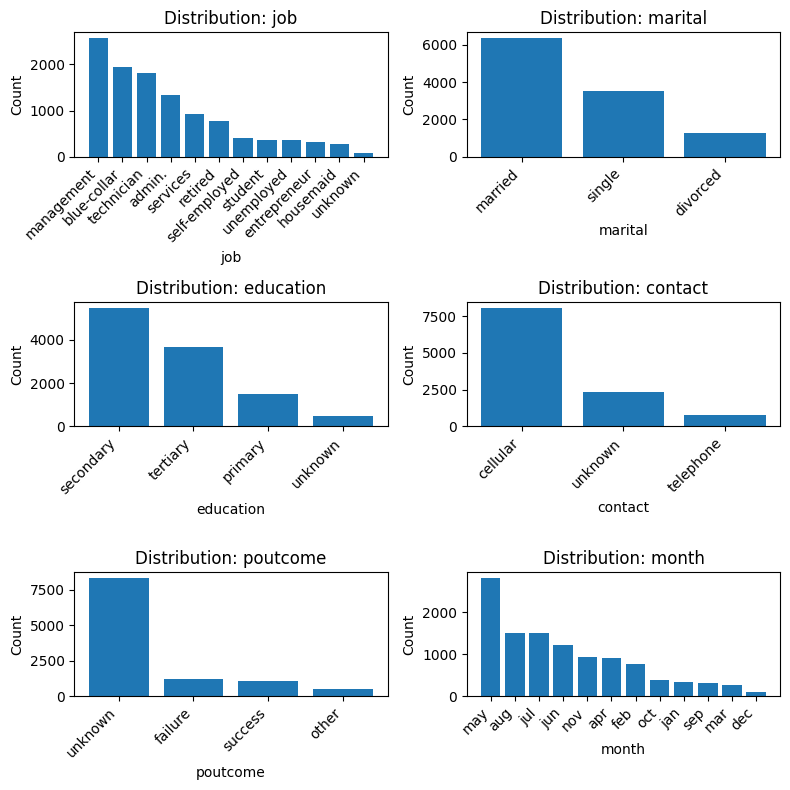

In [12]:
features = ["job", "marital", "education", "contact", "poutcome", "month"]

fig, axes = plt.subplots(3, 2, figsize=(8, 8))

for col, ax in zip(features, axes.flat):
    groups = df[col].value_counts()
    ax.bar(groups.index, groups.values)
    ax.set_title(f"Distribution: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(groups)))
    ax.set_xticklabels(groups.index, rotation=45, ha='right', fontsize=10)
    
plt.tight_layout()
plt.show()

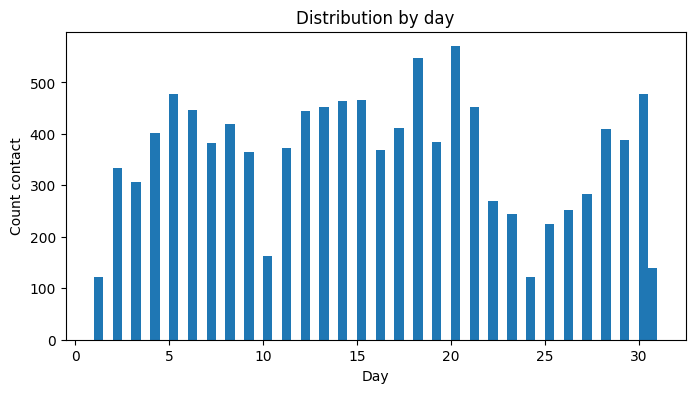

In [13]:
plt.figure(figsize=(8, 4))
plt.hist(df["day"], bins=60)
plt.title("Distribution by day")
plt.xlabel("Day")
plt.ylabel("Count contact")
plt.show()

The graph shows that the number of deposit requests is distributed by month, but there is a slight increase in contacts in the middle of the month.

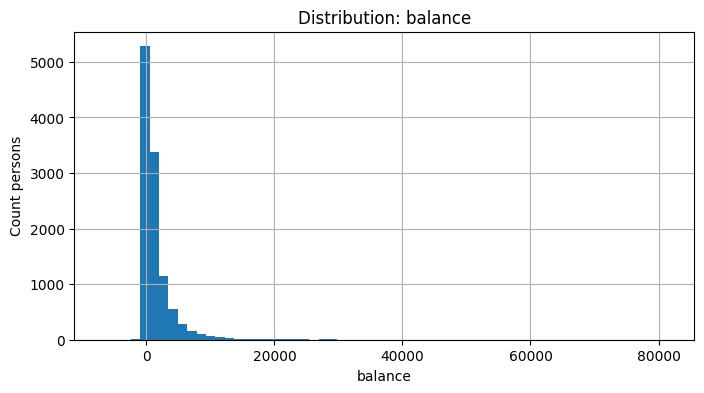

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(df["balance"], bins=60)
plt.title("Distribution: balance")
plt.xlabel("balance")
plt.ylabel("Count persons")
plt.grid()

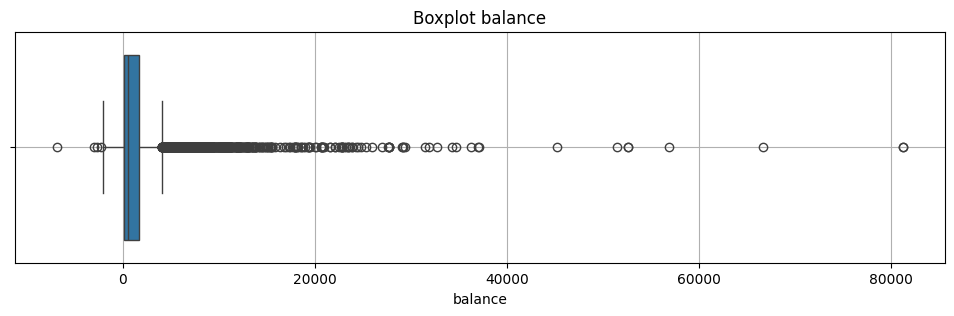

In [15]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df["balance"])
plt.title(f"Boxplot balance")
plt.grid()

The most people have a low balance, but there are some representatives with a large balance who are outliers.

### Correlation Matrix

In [16]:
df_corr = df.corr(numeric_only=True)

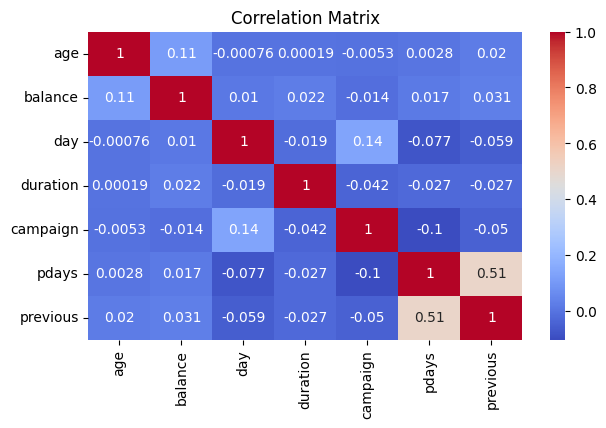

In [17]:
plt.figure(figsize=(7, 4))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Features have almost no correlation with each other.

## Feature engeneering

In [18]:
df = df.drop(["duration"], axis=1)

I am deleting the duration column since it can only be known after the call, it leads to data leakage.

### Outliers

In [19]:
df['balance'].describe(percentiles=[0.9, 0.95, 0.99])

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
50%        550.000000
90%       3897.600000
95%       6026.450000
99%      13226.980000
max      81204.000000
Name: balance, dtype: float64

In [20]:
p99 = df['balance'].quantile(0.99)
df = df[df["balance"] <= p99]

I am removing the richest 1%, as their condition is very different from the main data.

### Preprocessing binary features

In [21]:
columns = [
    "default",
    "housing",
    "loan",
    "deposit"
]

for col in columns:
    df[col] = df[col].map({"yes": 1, "no": 0})

### Preprocessing categorial features

In [22]:
df = pd.get_dummies(df, columns=["job", "marital", "education", "contact", "month", "poutcome"], drop_first=True, dtype=int)

In [23]:
df.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,2,-1,0,1,...,0,0,0,1,0,0,0,0,0,1


### Preprocessing numerical features

In [24]:
from sklearn.preprocessing import StandardScaler
skaler = StandardScaler()

In [25]:
df["balance"] = skaler.fit_transform(df[["balance"]])

In [26]:
df["pdays"] = df["pdays"].replace(-1, np.nan)
df["pdays"] = skaler.fit_transform(df[["pdays"]])
df["pdays"] = df["pdays"].replace(np.nan, -1)

### Split Data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [28]:
df = shuffle(df, random_state=42).reset_index(drop=True)

In [29]:
X = df.drop(["deposit"], axis=1)
Y = df["deposit"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Fit the model

In [31]:
from sklearn.model_selection import learning_curve, StratifiedKFold, cross_val_score

In [32]:
def create_learning_curve(model):
    cv = StratifiedKFold()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training F1')
    plt.plot(train_sizes, test_mean, color='red', marker='x', label='Validation F1')
    plt.legend()
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.grid()

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=600)

In [34]:
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

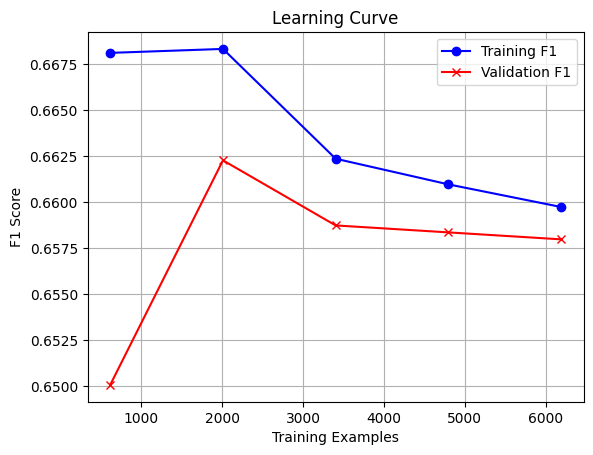

In [35]:
create_learning_curve(model)

## Evaluating the model

We will evaluate the model using 5 metrics:
- Precision
- Recall
- Accuracy
- F1 score
- ROC-AUC

In [36]:
def evaluate_model(y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"F1_score: {f1}")
    print(f"ROC-AUC: {roc_auc}")

In [37]:
from sklearn.metrics import (roc_auc_score,
                f1_score, accuracy_score, precision_score,
                recall_score)

In [38]:
y_pred = model.predict(X_test)

In [39]:
evaluate_model(y_pred)

Precision: 0.7256704980842912
Recall: 0.6086118251928021
Accuracy: 0.7082956259426848
F1_score: 0.6620062915064663
ROC-AUC: 0.7025435476162988


The logistic regression model predicts the customer's decision with 66,2% F1 score.

## Improving the result using trees

In [40]:
from sklearn.inspection import permutation_importance

def feature_importance(model):

    features = permutation_importance(
        model,
        X_test,
        y_test,
        scoring='f1',
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )
    
    importances = pd.Series(
        features.importances_mean,
        index=X_test.columns
    ).sort_values(ascending=False)
    
    return importances

### Fit the model

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf,  X_train, y_train, cv=5, scoring="f1")

In [43]:
scores.mean()

np.float64(0.6858657830222046)

In [44]:
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=4,
)

In [45]:
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=6,
    max_features='sqrt',
    random_state=42
)

In [46]:
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",6
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

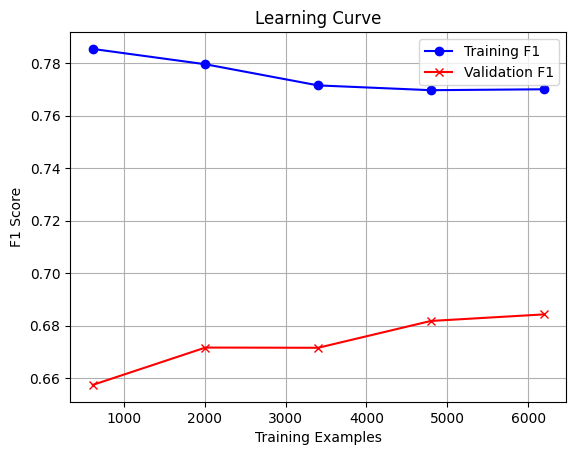

In [47]:
create_learning_curve(model)

### Evaluating the model

In [48]:
y_pred = model.predict(X_test)

In [49]:
evaluate_model(y_pred)

Precision: 0.7635135135135135
Recall: 0.653598971722365
Accuracy: 0.7423831070889895
F1_score: 0.7042936288088643
ROC-AUC: 0.7372599747753382


The RandomForestClassifier predicts the customer's decision with 70,4% F1 score.

In [50]:
features = feature_importance(model)

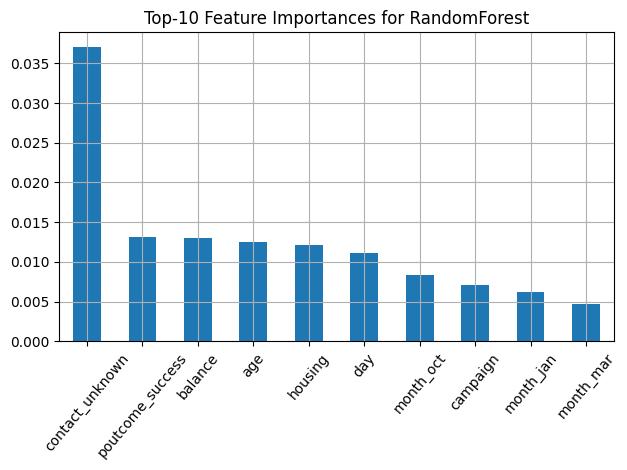

In [51]:
features.head(10).plot(kind='bar')
plt.xticks(rotation=50)
plt.title('Top-10 Feature Importances for RandomForest')
plt.grid()
plt.tight_layout()

## Improving the result using gradient boosting

### Fit the model

In [52]:
from xgboost import XGBClassifier

In [53]:
xgbcls = XGBClassifier()
scores = cross_val_score(xgbcls, X_train, y_train, cv=5, scoring="f1")

In [54]:
scores.mean()

np.float64(0.68854699537731)

In [55]:
model = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=1.0,
    random_state=42
)

In [56]:
model.fit(X_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.7
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

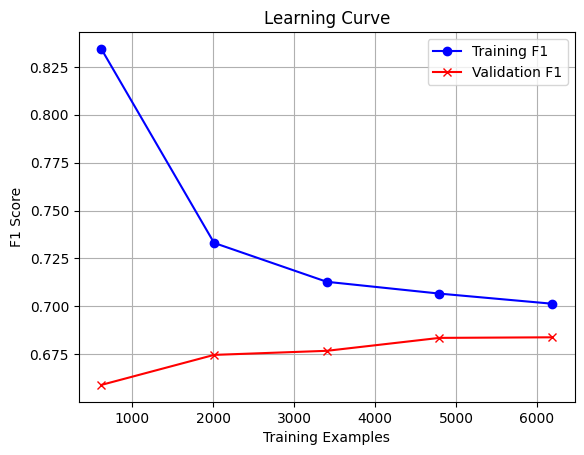

In [57]:
create_learning_curve(model)

### Evaluating the model

In [58]:
y_pred = model.predict(X_test)

In [59]:
evaluate_model(y_pred)

Precision: 0.765564950038432
Recall: 0.6401028277634961
Accuracy: 0.7390648567119156
F1_score: 0.6972348617430871
ROC-AUC: 0.7333544269573592


The XGBClassifier predicts the customer's decision with 69,7% F1 score.

In [60]:
features = feature_importance(model)

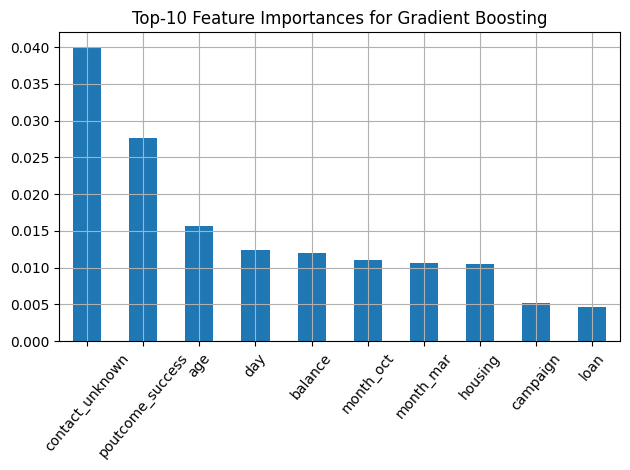

In [61]:
features.head(10).plot(kind='bar')
plt.xticks(rotation=50)
plt.title('Top-10 Feature Importances for Gradient Boosting')
plt.grid()
plt.tight_layout()

## Conclusion

In this notebook, I explored the Bank Marketing dataset using classification. The task was to predict whether the client would take a deposit in the bank or not. I performed exploratory dataset, built graphs, and worked with features. I have trained and tested 3 models: Logistic Regression, RandomForestClassifier and XGBClassifier. According to the F1 score metric, the models do not have a strong difference. Due to the fact that clients with similar features often make different decisions, it proved difficult for the models to identify consistent patterns, so the results not higher than 70%. The most important features in making a decision were: contact, poutcome, housing, age and balance.